In [1]:
import pandas as pd
import numpy as np
import io

data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


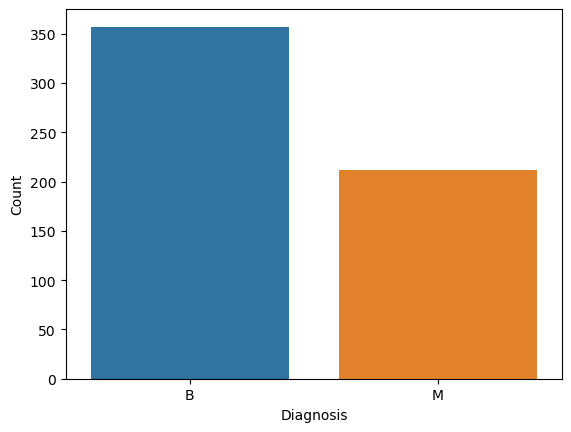

Benign: 357
Malignant: 212


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'diagnosis' column contains categorical values 'B' and 'M'
data['diagnosis'] = data['diagnosis'].astype('category')

# Count occurrences of each category
diagnosis_counts = data['diagnosis'].value_counts()

# Create a DataFrame with category and count columns
count_data = pd.DataFrame({'diagnosis': diagnosis_counts.index, 'count': diagnosis_counts.values})

# Plot the count
ax = sns.barplot(x='diagnosis', y='count', data=count_data)
ax.set_ylabel('Count')
ax.set_xlabel('Diagnosis')

plt.show()

# Display counts
print('Benign:', diagnosis_counts['B'])
print('Malignant:', diagnosis_counts['M'])

In [4]:
del data['Unnamed: 32']

In [5]:
X = data.iloc[:, 2].values
y = data.iloc[:, 1].values

In [6]:
# By Using Label Encoder we will Encode the Categorical Data

from sklearn.preprocessing import LabelEncoder

labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [7]:
# Now we will Split our data into Testing and Traning Part

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are 1D arrays
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
X_train

array([[-0.52787029],
       [-0.55333608],
       [ 2.15452653],
       [-0.10344041],
       [ 0.54735206],
       [-0.84760746],
       [-0.35809834],
       [ 0.98027054],
       [-0.59294954],
       [ 2.30166222],
       [ 0.94065708],
       [ 1.82347123],
       [-1.32155416],
       [ 0.0804792 ],
       [ 0.56432926],
       [-0.74008523],
       [ 0.13141078],
       [ 1.27737145],
       [-0.32131442],
       [-1.57451437],
       [-0.30716675],
       [-0.70047177],
       [-1.52839299],
       [ 0.69731729],
       [ 1.71028993],
       [ 0.46529562],
       [-0.48259777],
       [ 0.53603393],
       [-0.51372263],
       [-0.17983779],
       [-1.68062184],
       [ 0.86425971],
       [ 1.82913029],
       [-1.31051898],
       [ 0.27854648],
       [ 0.24176255],
       [ 0.3068418 ],
       [-1.33853136],
       [-1.20526037],
       [ 0.38606871],
       [-0.35243927],
       [-0.72593757],
       [-0.76555102],
       [-1.48481819],
       [-0.5024045 ],
       [ 0

In [10]:
X_test

array([[-0.20813312],
       [-0.26189423],
       [-0.0327021 ],
       [ 0.03520668],
       [-0.31282582],
       [-0.79101681],
       [-0.59012001],
       [-0.68915364],
       [-1.812761  ],
       [-1.09660633],
       [ 0.15687658],
       [ 0.13706985],
       [-1.34079498],
       [ 0.76522607],
       [ 0.14272891],
       [ 0.37475058],
       [-1.44124339],
       [ 1.8036645 ],
       [ 1.53202938],
       [ 1.9253344 ],
       [-0.64954019],
       [ 0.59545412],
       [-0.18832639],
       [-0.64954019],
       [ 2.0470043 ],
       [-0.6240744 ],
       [-0.91551624],
       [-0.11475854],
       [-0.20813312],
       [ 1.31132584],
       [-0.37507554],
       [ 1.82064169],
       [-0.28170096],
       [ 0.57281786],
       [-1.24430792],
       [-0.41185946],
       [-0.24491704],
       [ 1.37640509],
       [ 0.20497863],
       [ 0.26722835],
       [ 0.28137601],
       [-1.48764772],
       [ 0.5332044 ],
       [-1.07962913],
       [-0.25340564],
       [ 2

In [11]:
!pip install keras

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [13]:
from keras.models import Sequential
from keras.layers import Dense

# Assuming your input data has 1 feature
input_shape = (1,)

classifier = Sequential()
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_shape=input_shape))
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
classifier.compile(optimizer = "Adam", loss= 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
6/6 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5742
Epoch 2/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.6289
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.6289
Epoch 4/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.6289
Epoch 5/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.6289
Epoch 6/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.6289
Epoch 7/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.6289
Epoch 8/150
6/6 [==============================] - 0s 6ms/step - loss: 0.6837 - accuracy: 0.6348
Epoch 9/150
6/6 [==============================] - 0s 6ms/step - loss: 0.6811 - accuracy: 0.6523
Epoch 10/150
6/6 [==============================] - 0s 6ms/step - loss: 0.6780 - accuracy: 0.6895
Epoch 11/150
6/6 [===========

In [16]:
X_test

array([[-0.20813312],
       [-0.26189423],
       [-0.0327021 ],
       [ 0.03520668],
       [-0.31282582],
       [-0.79101681],
       [-0.59012001],
       [-0.68915364],
       [-1.812761  ],
       [-1.09660633],
       [ 0.15687658],
       [ 0.13706985],
       [-1.34079498],
       [ 0.76522607],
       [ 0.14272891],
       [ 0.37475058],
       [-1.44124339],
       [ 1.8036645 ],
       [ 1.53202938],
       [ 1.9253344 ],
       [-0.64954019],
       [ 0.59545412],
       [-0.18832639],
       [-0.64954019],
       [ 2.0470043 ],
       [-0.6240744 ],
       [-0.91551624],
       [-0.11475854],
       [-0.20813312],
       [ 1.31132584],
       [-0.37507554],
       [ 1.82064169],
       [-0.28170096],
       [ 0.57281786],
       [-1.24430792],
       [-0.41185946],
       [-0.24491704],
       [ 1.37640509],
       [ 0.20497863],
       [ 0.26722835],
       [ 0.28137601],
       [-1.48764772],
       [ 0.5332044 ],
       [-1.07962913],
       [-0.25340564],
       [ 2

In [17]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 6ms/step


In [18]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [19]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

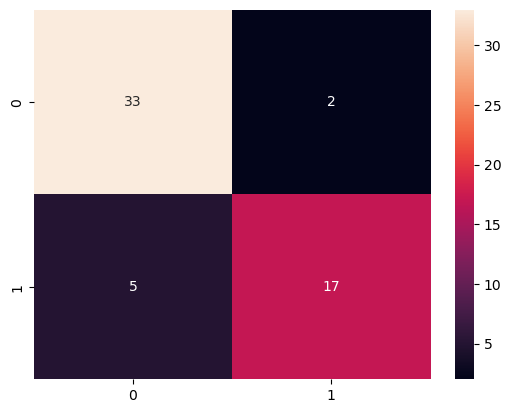

In [20]:
sns.heatmap(cm, annot= True)
plt.savefig('h.png')